In [1]:
import pickle
import numpy as np

import tensorflow as tf
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
import cv2
import matplotlib.pyplot as plt
from utils.data_processing import *

def show_images(left_image, center_image, right_image): 
                
    fig = plt.figure(figsize = (15, 5))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
 
    axis = fig.add_subplot(1, 5, 1, xticks=[], yticks=[])
    axis.imshow(left_image)
    axis.annotate("left: orig\n", xy=(0, 0))
    
    axis = fig.add_subplot(1, 5, 2, xticks=[], yticks=[])
    img, angle  = flip_image(left_image, 1)
    axis.imshow(img)
    axis.annotate("left: flip\n", xy=(0, 0))
    
    axis = fig.add_subplot(1, 5, 3, xticks=[], yticks=[])
    img, angle  = trans_image(left_image, 1, 50, 10)
    axis.imshow(img)
    axis.annotate("left: translation\n", xy=(0, 0))
    
    axis = fig.add_subplot(1, 5, 4, xticks=[], yticks=[])
    img = brighten_augmentation(left_image)
    axis.imshow(img)
    axis.annotate("left: brighten\n", xy=(0, 0))
    
    axis = fig.add_subplot(1, 5, 5, xticks=[], yticks=[])
    img = preprocess_image(left_image)
    axis.imshow(img)
    axis.annotate("left: preprocess\n", xy=(0, 0))
    
    fig = plt.figure(figsize = (15, 5))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    axis = fig.add_subplot(2, 5, 1, xticks=[], yticks=[])
    axis.imshow(center_image)
    axis.annotate("center: orig\n", xy=(0, 0))
    
    axis = fig.add_subplot(2, 5, 2, xticks=[], yticks=[])
    img, angle  = flip_image(center_image, 1)
    axis.imshow(img)
    axis.annotate("center: flip\n", xy=(0, 0))
    
    axis = fig.add_subplot(2, 5, 3, xticks=[], yticks=[])
    img, angle  = trans_image(center_image, 1, 50, 10)
    axis.imshow(img)
    axis.annotate("center: translation\n", xy=(0, 0))
    
    axis = fig.add_subplot(2, 5, 4, xticks=[], yticks=[])
    img = brighten_augmentation(center_image)
    axis.imshow(img)
    axis.annotate("center: brighten\n", xy=(0, 0))
    
    axis = fig.add_subplot(2, 5, 5, xticks=[], yticks=[])
    img = preprocess_image(center_image)
    axis.imshow(img)
    axis.annotate("center: preprocess\n", xy=(0, 0))
    
    fig = plt.figure(figsize = (15, 5))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    
    axis = fig.add_subplot(3, 5, 1, xticks=[], yticks=[])
    axis.imshow(right_image)
    axis.annotate("right: orig\n", xy=(0, 0))
    
    axis = fig.add_subplot(3, 5, 2, xticks=[], yticks=[])
    img, angle  = flip_image(right_image, 1)
    axis.imshow(img)
    axis.annotate("right: flip\n", xy=(0, 0))
    
    axis = fig.add_subplot(3, 5, 3, xticks=[], yticks=[])
    img, angle  = trans_image(right_image, 1, 50, 10)
    axis.imshow(img)
    axis.annotate("right: translation\n", xy=(0, 0))
    
    axis = fig.add_subplot(3, 5, 4, xticks=[], yticks=[])
    img = brighten_augmentation(right_image)
    axis.imshow(img)
    axis.annotate("right: brighten\n", xy=(0, 0))
    
    axis = fig.add_subplot(3, 5, 5, xticks=[], yticks=[])
    img = preprocess_image(right_image)
    axis.imshow(img)
    axis.annotate("right: preprocess\n", xy=(0, 0))
    
    plt.show()
    

Track 1 images left, center and right (pre and post cropping)


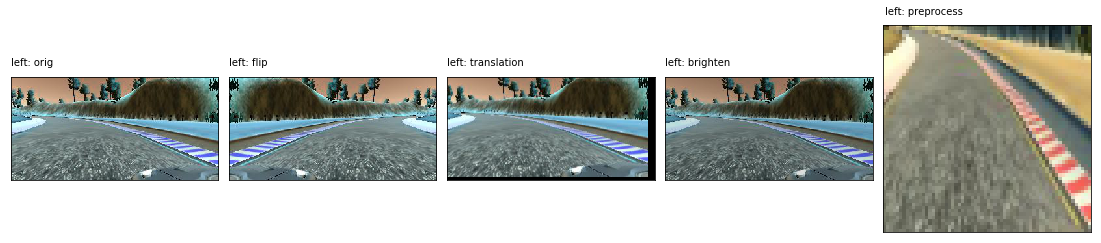

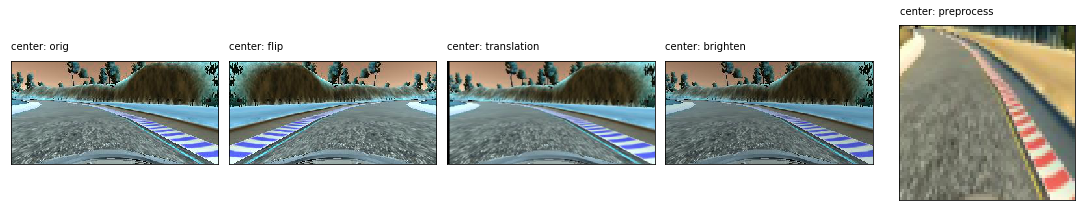

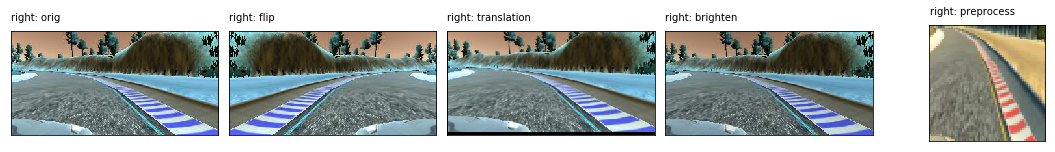

In [3]:
# CSV format center_image_path, left_image_path, right_image_path, steering, throttle, brake, speed
import csv


track_one_csv_file = "./data/track1/driving_log.csv"
track_two_csv_file = "./data/track2/driving_log.csv"

data = []

show_track1_images = True
show_track2_images = True

with open(track_one_csv_file) as csvfile:
    track_one_csv = csv.reader(csvfile, delimiter=',')
    
    print ("Track 1 images left, center and right (pre and post cropping)")
    for row in track_one_csv:
        left_path = "./data/track1/IMG/" + row[1].split("/")[-1]
        center_path = "./data/track1/IMG/" + row[0].split("/")[-1]
        right_path = "./data/track1/IMG/" + row[2].split("/")[-1]

        steering_angle = float(row[3])
        
        if abs(steering_angle) > 0.05:
            data.append((left_path, center_path, right_path, steering_angle))
        
        left_image = cv2.imread(left_path)
        
        center_image = cv2.imread(center_path)
        
        right_image = cv2.imread(right_path)

        if show_track1_images:
            show_images(left_image, center_image, right_image)
            show_track1_images = False

In [5]:
# CSV format center_image_path, left_image_path, right_image_path, steering, throttle, brake, speed
import csv


sample_csv_file = "./data/data/driving_log.csv"

header = True

with open(sample_csv_file) as csvfile:
    sample_csv = csv.reader(csvfile, delimiter=',')
    
    print ("Track 1 images left, center and right (pre and post cropping)")
    for row in sample_csv:
        if header:
            header = False
            continue
            
        left_path = "./data/data/IMG/" + row[1].split("/")[-1]
        center_path = "./data/data/IMG/" + row[0].split("/")[-1]
        right_path = "./data/data/IMG/" + row[2].split("/")[-1]

        steering_angle = float(row[3])
        
        if abs(steering_angle) > 0.05:
            data.append((left_path, center_path, right_path, steering_angle))
        
        left_image = cv2.imread(left_path)
        
        center_image = cv2.imread(center_path)
        
        right_image = cv2.imread(right_path)

        if show_track1_images:
            show_images(left_image, center_image, right_image)
            show_track1_images = False

Track 1 images left, center and right (pre and post cropping)


TypeError: '_csv.reader' object is not subscriptable

In [ ]:
with open(track_two_csv_file) as csvfile:
    track_one_csv = csv.reader(csvfile, delimiter=',')
    
    print ("Track 2 images left, center and right (pre and post cropping)")
    for row in track_one_csv:
        left_path = "./data/track2/IMG/" + row[1].split("/")[-1]
        center_path = "./data/track2/IMG/" + row[0].split("/")[-1]
        right_path = "./data/track2/IMG/" + row[2].split("/")[-1]
        
        steering_angle = float(row[3])
        
        if abs(steering_angle) > 0.05:
            continue
            data.append((left_path, center_path, right_path, steering_angle))
            data.append((left_path, center_path, right_path, steering_angle))
            data.append((left_path, center_path, right_path, steering_angle))
        
        left_image = cv2.imread(left_path)

        center_image = cv2.imread(center_path)

        right_image = cv2.imread(right_path)   
      
        if show_track2_images:
            show_images(left_image, center_image, right_image)
            show_track2_images = False
            break

In [ ]:
from utils.generator import behaviour_cloning_generator

from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(data, test_size=0.2)

BATCH_SIZE = 128
EPOCHS = 20

nb_training_data = len(train_data)
nb_validation_data = len(validation_data)

print ("Number of training data : %s" % nb_training_data)
print ("Number of validation data : %s" % nb_validation_data)

# compile and train the model using the generator function
train_generator = behaviour_cloning_generator(train_data, batch_size=BATCH_SIZE)
validation_generator = behaviour_cloning_generator(validation_data, batch_size=BATCH_SIZE)

In [ ]:
fig = plt.figure(figsize = (15, 10))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for images, angles in train_generator:
    for i in range(len(images)):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(images[i])
        axis.annotate("steer: %.4f\n" % angles[i], xy=(0, 0))
        
        if i == 9:
            break
        
    plt.show()
    break

In [ ]:
from utils.models import Models

model = Models(input_shape=(64, 64, 3)).model

model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model.summary()

In [ ]:
history_object = model.fit_generator(train_generator, samples_per_epoch =
                                    nb_training_data, validation_data = 
                                    validation_generator,
                                    nb_val_samples = len(validation_data), 
                                    nb_epoch=EPOCHS, verbose=1)

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


model.save("model.h5")